In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv') 
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
x=df[['enginesize','horsepower','citympg','highwaympg']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [5]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

In [6]:
print('Name: devendran M L')
print('Reg No:212225240030')
print("MODEL COEFFICIENTS:")
for feature,coef in zip(x.columns,model.coef_):
    print(f"{feature:}:{coef:}")
print(f"{'Intercept':}:{model.intercept_:}")
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':}:{mean_squared_error(y_test,y_pred):}")
print(f"{'RMSE':}:{np.sqrt(mean_squared_error(y_test,y_pred)):}")
print(f"{'R-squared':}:{r2_score(y_test,y_pred):}")

Name: devendran M L
Reg No:212225240030
MODEL COEFFICIENTS:
enginesize:4523.404901011966
horsepower:1694.2232554525806
citympg:-392.5731841571549
highwaympg:-816.3577991826088
Intercept:13223.414634146342

MODEL PERFORMANCE:
MSE:16471505.900042146
RMSE:4058.5103055237087
R-squared:0.7913520781370976


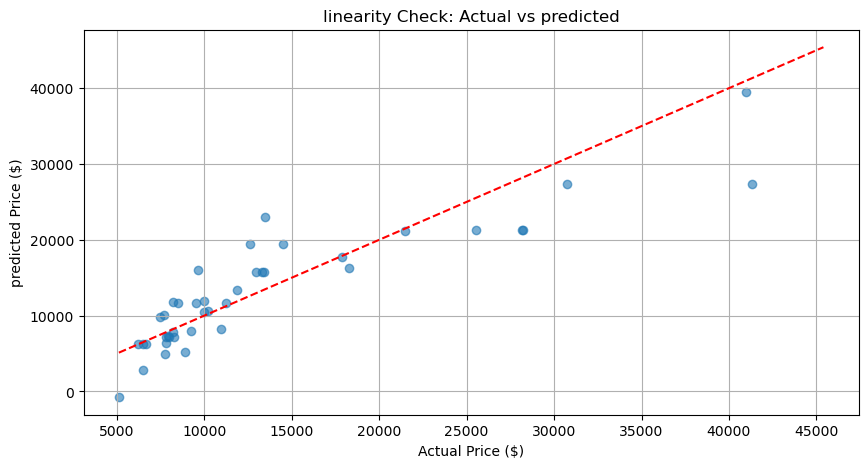

In [7]:
#linearity Check
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title("linearity Check: Actual vs predicted")
plt.xlabel("Actual Price ($)")
plt.ylabel("predicted Price ($)")
plt.grid(True)
plt.show()

In [8]:
#independence (DW)
residuals = y_test - y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-watson statistic: {dw_test:.2f}",
     "\n(Values close to 2 indicate no autocorrelation)")


Durbin-watson statistic: 2.28 
(Values close to 2 indicate no autocorrelation)


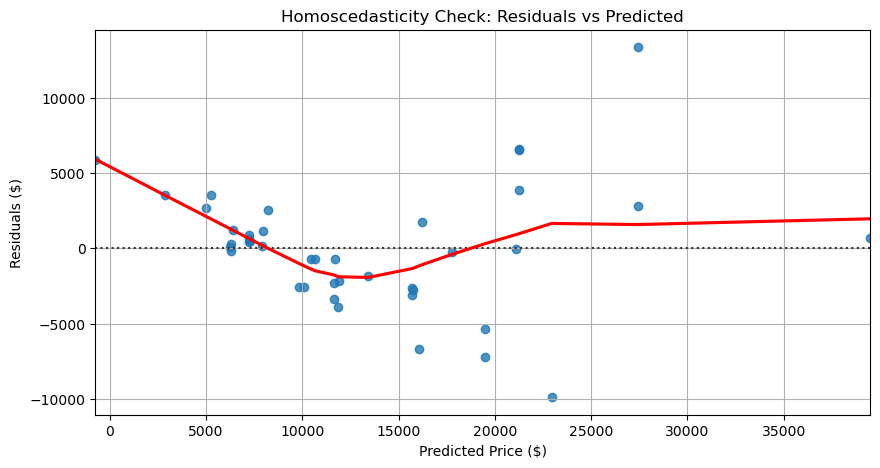

In [9]:
#homoscedasticity
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

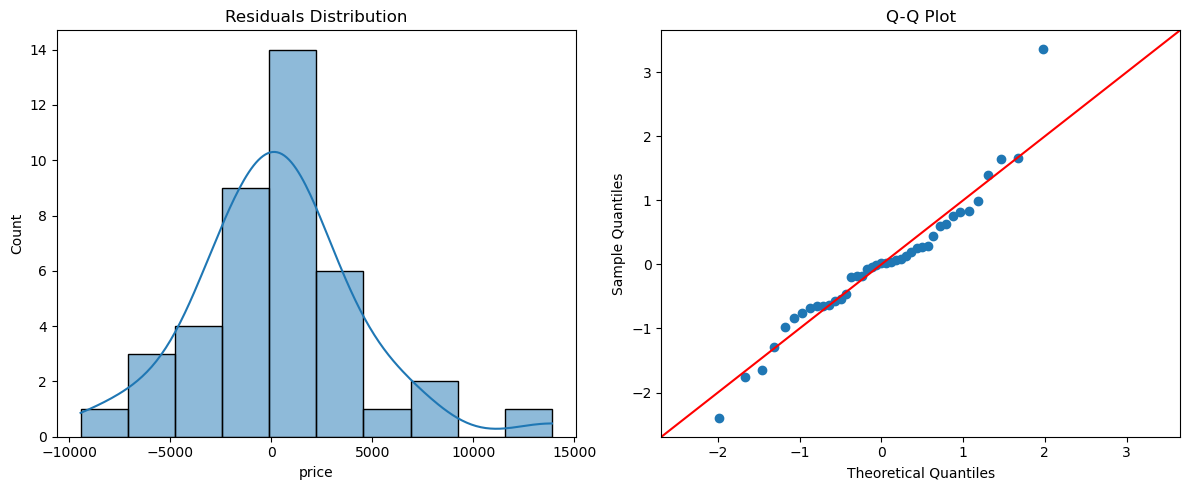

In [10]:
# normality of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()